In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Load Data**

In [5]:
#Load Dataset
data = pd.read_csv("/content/fitness_tracker_data_analysis_dataset.csv")
print(data.head())

     ID Category      Date  Steps Count  Calories Burned     Label
0  ID_1   Type A  1/1/2018          895           393.65  Negative
1  ID_2   Type D  1/2/2018          496           287.95  Positive
2  ID_3   Type D  1/3/2018          613           110.99  Negative
3  ID_4   Type D  1/4/2018            3           151.04   Neutral
4  ID_5   Type D  1/5/2018          160           308.41  Negative


**Data Explore**

In [6]:
#Basic info
print(data.info())

#Check for missing value
print(data.isnull().sum())

#Summary statistics
print(data.describe())

#Unique values in categories columns
print("Unique Categories:", data['Category'].unique())
print("Unique Labels:", data['Label'].unique())

#average values
print("Average Steps Count:", data['Steps Count'].mean())
print("Average Calories Burned:", data['Calories Burned'].mean())

#Count values
print("Counting Label:", data['Label'].count())
print("Counting Category:", data['Category'].count())

#Max values
print("Max Steps Count:", data['Steps Count'].max())
print("Max Calories Burned:", data['Calories Burned'].max())

#Median values
print("Median Steps Count:", data['Steps Count'].median())
print("Median Calories Burned:", data['Calories Burned'].median())

#Min values
print("Min Steps Count:", data['Steps Count'].min())
print("Min Calories Burned:", data['Calories Burned'].min())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   object 
 1   Category         1000 non-null   object 
 2   Date             1000 non-null   object 
 3   Steps Count      1000 non-null   int64  
 4   Calories Burned  1000 non-null   float64
 5   Label            1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
ID                 0
Category           0
Date               0
Steps Count        0
Calories Burned    0
Label              0
dtype: int64
       Steps Count  Calories Burned
count  1000.000000      1000.000000
mean    509.015000       256.616200
std     286.534883       141.997273
min       3.000000        10.420000
25%     247.000000       133.437500
50%     522.500000       263.590000
75%     757.000000       374.522500
max     999.000000       499.930

**Clean the data**

In [7]:
#Drop row with missing values
data = data.dropna()

#Convert Date Column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#Convert for duplicate rows
data = data.drop_duplicates()

#Validate data types
print(data.dtypes)

print(data.isnull().sum())

ID                         object
Category                   object
Date               datetime64[ns]
Steps Count                 int64
Calories Burned           float64
Label                      object
dtype: object
ID                 0
Category           0
Date               0
Steps Count        0
Calories Burned    0
Label              0
dtype: int64


**Data Analysis**




In [8]:
#Total Steps Count by Category
total_steps_by_category = data.groupby('Category')['Steps Count'].sum()
print(total_steps_by_category)

#Total ID by Category
total_id_by_category = data.groupby('Category')['ID'].count()
print(total_id_by_category)

#Label by Average Steps Count
label_by_avg_steps = data.groupby('Label')['Steps Count'].mean()
print(label_by_avg_steps)

#Label by ID
label_by_id = data.groupby('Label')['ID'].count()
print(label_by_id)

#Category by Average Calories Burned
category_by_avg_calories = data.groupby('Category')['Calories Burned'].mean()
print(category_by_avg_calories)

#max Category
max_category = data.groupby('Category')['Steps Count'].mean()
print(max_category)

#min Category
min_category = data.groupby('Category')['Steps Count'].min()
print(min_category)

#Monthly Steps Count
data['Month'] = data['Date'].dt.month
monthly_steps = data.groupby('Month')['Steps Count'].sum()
print(monthly_steps)

#Monthly ID
monthly_id = data.groupby('Month')['ID'].count()
print(monthly_id)

#Monthly Calories Burned
monthly_calories = data.groupby('Month')['Calories Burned'].sum()
print(monthly_calories)

#Monthly Average Steps Count
monthly_avg_steps = data.groupby('Month')['Steps Count'].mean()
print(monthly_avg_steps)

#Monthly Average Calories Burned
monthly_avg_calories = data.groupby('Month')['Calories Burned'].mean()
print(monthly_avg_calories)

#Identify Categories with the Highest Steps Count
highest_steps_category = data.groupby('Category')['Steps Count'].sum().sort_values()
print(highest_steps_category)


Category
Type A    135004
Type B    120749
Type C    121651
Type D    131611
Name: Steps Count, dtype: int64
Category
Type A    256
Type B    250
Type C    235
Type D    259
Name: ID, dtype: int64
Label
Negative    506.090909
Neutral     504.211356
Positive    516.062323
Name: Steps Count, dtype: float64
Label
Negative    330
Neutral     317
Positive    353
Name: ID, dtype: int64
Category
Type A    258.822617
Type B    252.309160
Type C    260.852596
Type D    254.748880
Name: Calories Burned, dtype: float64
Category
Type A    527.359375
Type B    482.996000
Type C    517.663830
Type D    508.150579
Name: Steps Count, dtype: float64
Category
Type A     6
Type B     3
Type C    13
Type D     3
Name: Steps Count, dtype: int64
Category
Type A    556.0
Type B    472.0
Type C    544.0
Type D    517.0
Name: Steps Count, dtype: float64
Month
1     43165
2     43134
3     44580
4     45797
5     48365
6     50689
7     49923
8     47482
9     39268
10    32721
11    29986
12    33905
Name: Ste

**Visualization**

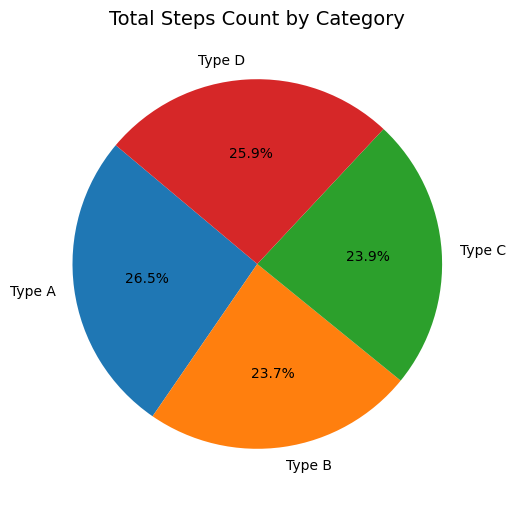

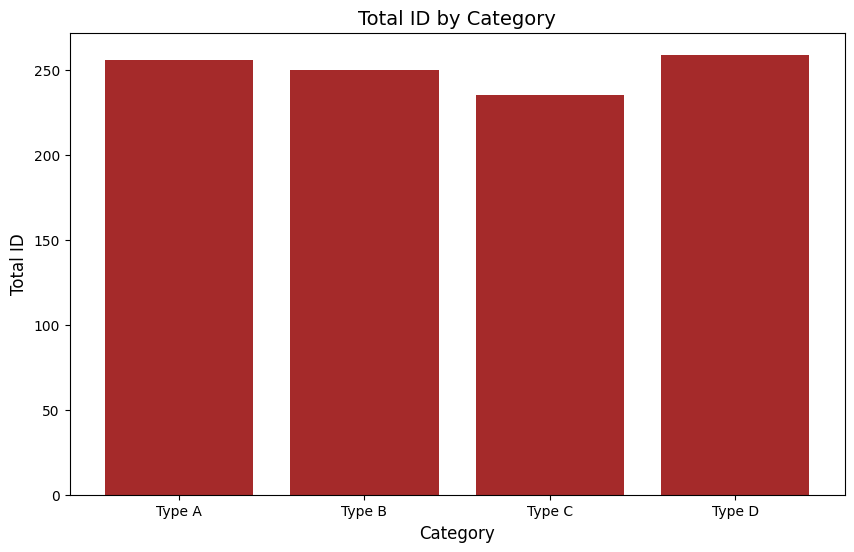

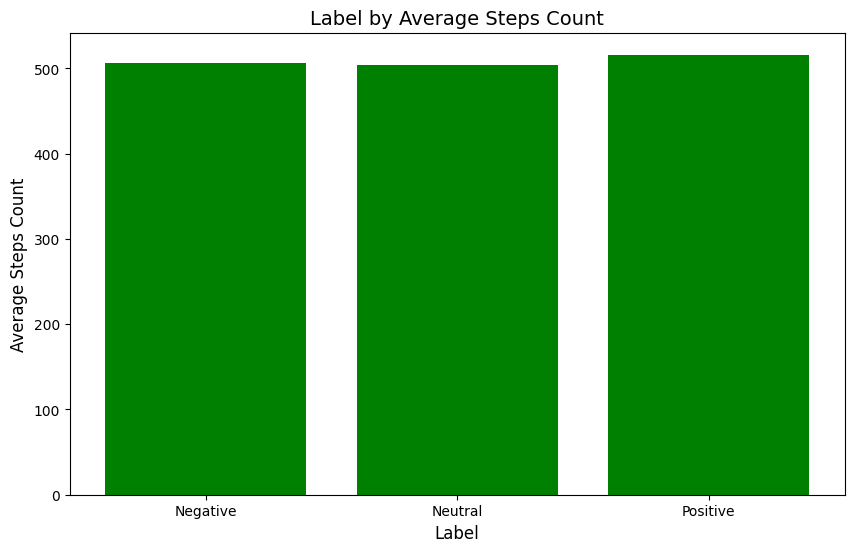

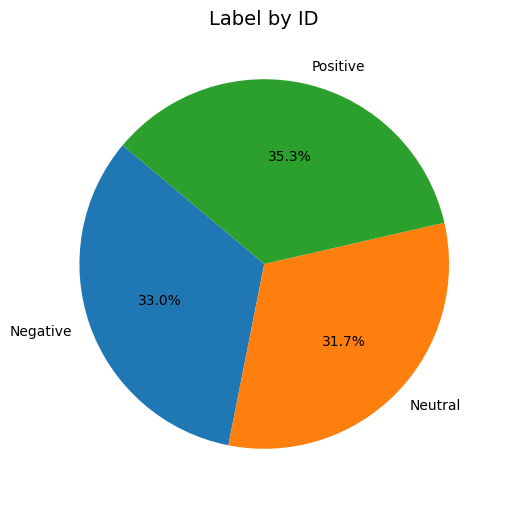

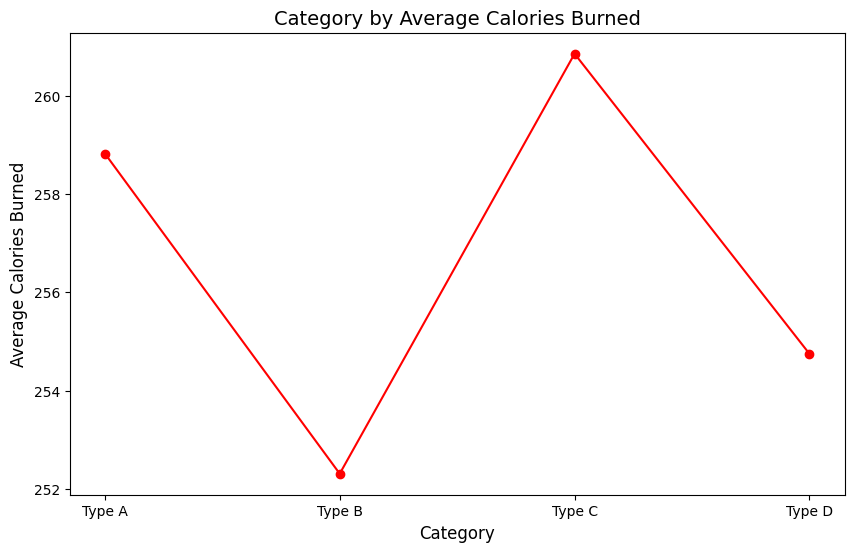

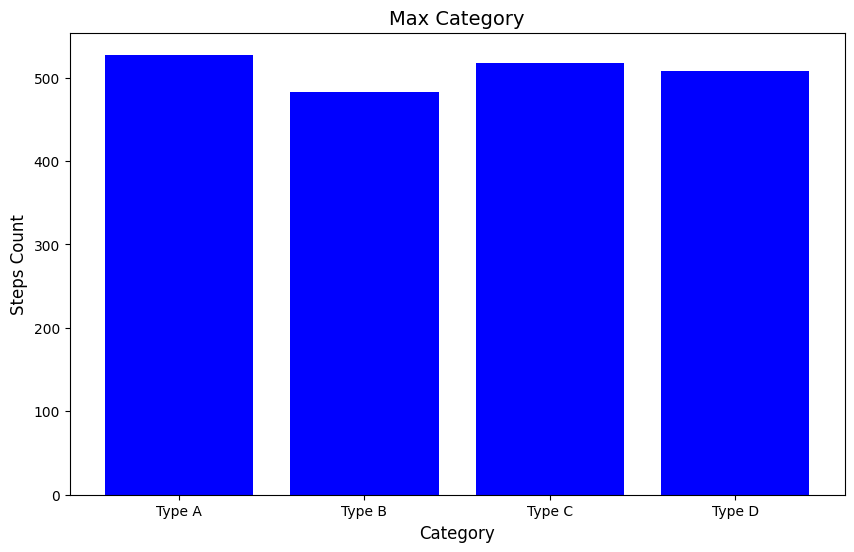

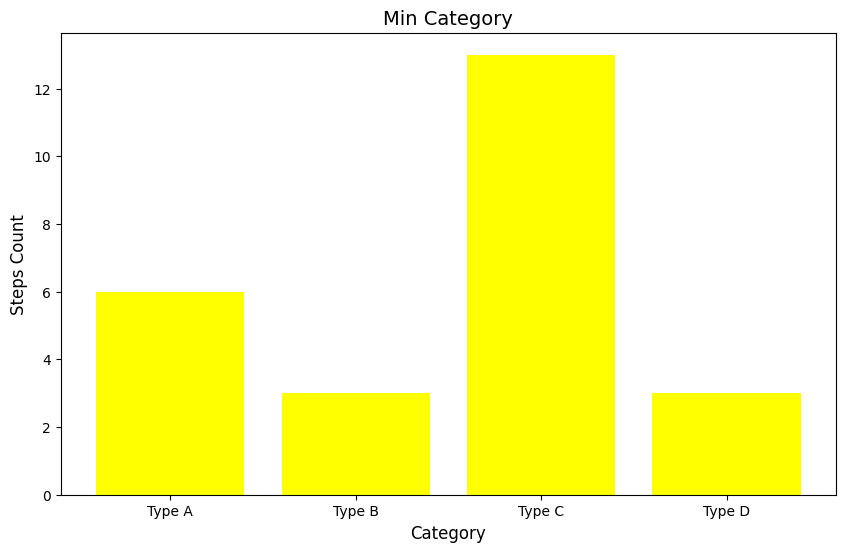

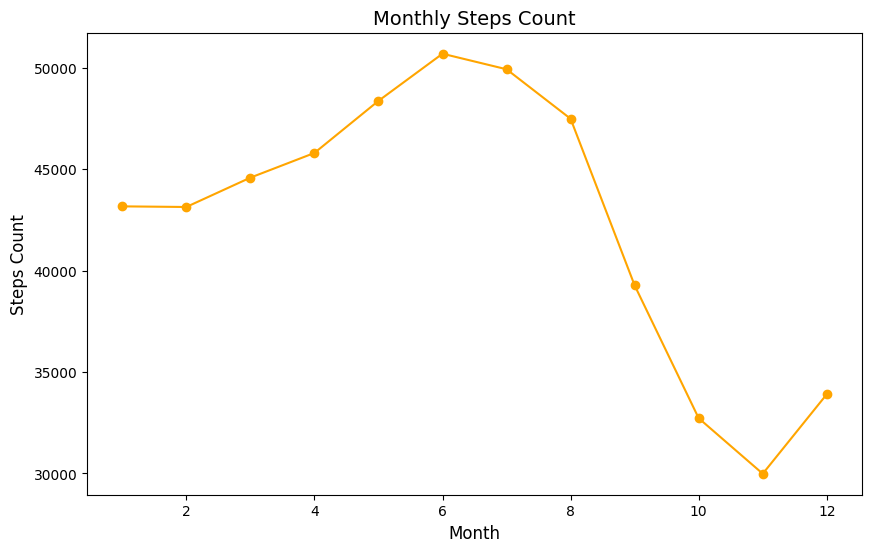

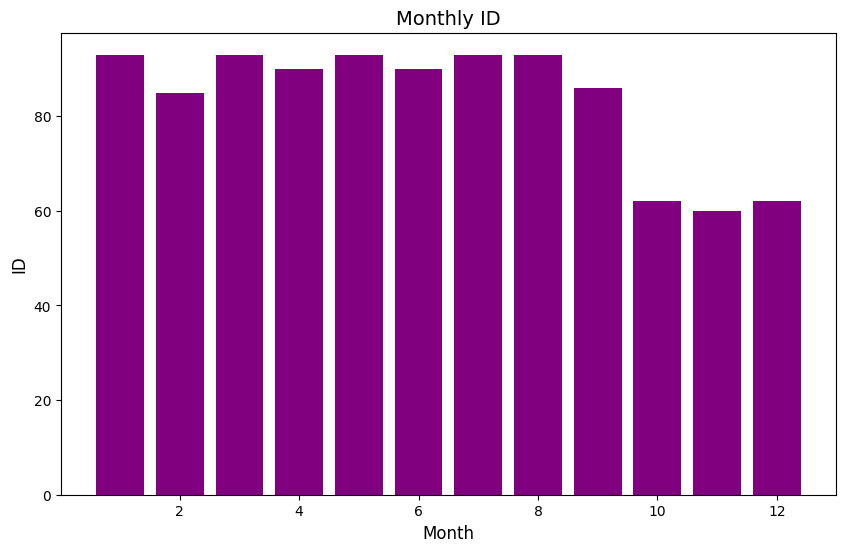

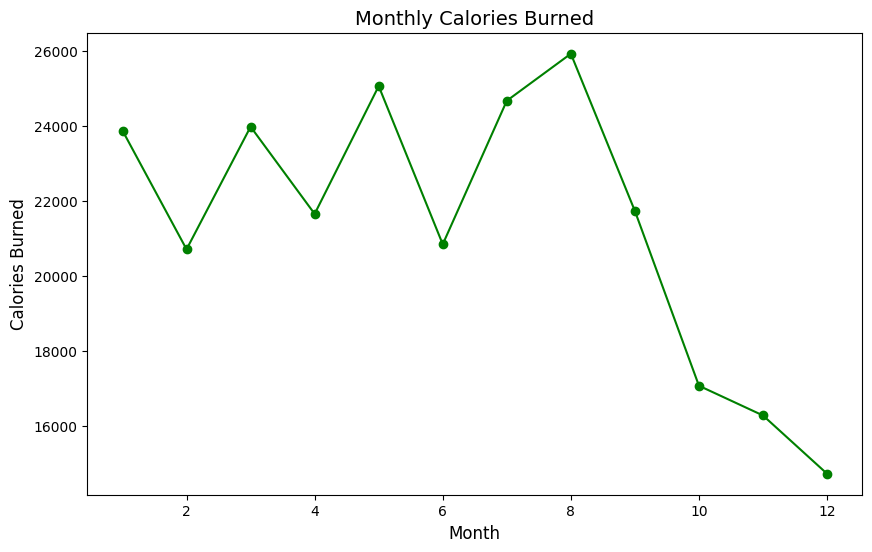

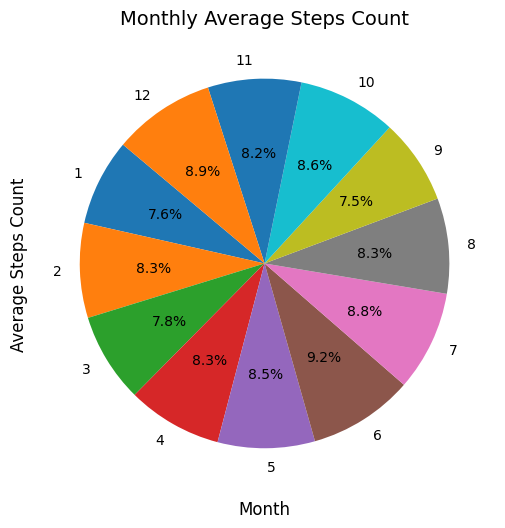

In [26]:
#Visualization
plt.figure(figsize=(10, 6))
plt.pie(total_steps_by_category, labels=total_steps_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Steps Count by Category', fontsize=14)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(total_id_by_category.index, total_id_by_category.values, color='Brown')
plt.title('Total ID by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total ID', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(label_by_avg_steps.index, label_by_avg_steps.values, color='Green')
plt.title('Label by Average Steps Count', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Average Steps Count', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(label_by_id, labels=label_by_id.index, autopct='%1.1f%%', startangle=140)
plt.title('Label by ID', fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(category_by_avg_calories.index, category_by_avg_calories.values, marker='o', linestyle='-', color='Red')
plt.title('Category by Average Calories Burned', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(max_category.index, max_category.values, color='Blue')
plt.title('Max Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Steps Count', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(min_category.index, min_category.values, color='Yellow')
plt.title('Min Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Steps Count', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_steps.index, monthly_steps.values, marker='o', linestyle='-', color='Orange')
plt.title('Monthly Steps Count', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Steps Count', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(monthly_id.index, monthly_id.values, color='Purple')
plt.title('Monthly ID', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_calories.index, monthly_calories.values, marker='o', linestyle='-', color='Green')
plt.title('Monthly Calories Burned', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(monthly_avg_steps, labels=monthly_avg_steps.index, autopct='%1.1f%%', startangle=140)
plt.title('Monthly Average Steps Count', fontsize=14)
plt.show()